In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_data=pd.read_csv('train.csv')

In [3]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [6]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [7]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
titanic_data['Embarked'].fillna('S',inplace=True)

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
x=titanic_data.iloc[:,2:]

In [12]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
x.drop('Name',axis=1,inplace=True)

In [14]:
x.drop('Ticket',axis=1,inplace=True)

In [15]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [16]:
y=titanic_data['Survived']

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lbl=LabelEncoder()

In [19]:
x['Sex']=lbl.fit_transform(x['Sex'])
x['Embarked']=lbl.fit_transform(x['Embarked'])

In [20]:
x['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
desTree=DecisionTreeClassifier(criterion='gini')

In [25]:
desTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred=desTree.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [28]:
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
print(confusion_matrix(y_pred,y_test))

[[93 22]
 [17 47]]


In [31]:
print(accuracy_score(y_pred,y_test))

0.7821229050279329


In [32]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       115
           1       0.68      0.73      0.71        64

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [33]:
from sklearn.tree import export_graphviz
from sklearn import tree
#from sklearn.externals.six import StringIO
from IPython.display import Image
from io import StringIO
from pydotplus import graph_from_dot_data

In [34]:
feature_cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [35]:
dot_data = StringIO()

In [36]:
dot_data

In [37]:
#feature_name: Independent Variables, class_names: Dependent Variables
tree.export_graphviz(desTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names='Survived')

In [38]:
graph = graph_from_dot_data(dot_data.getvalue())  

In [39]:
graph

In [40]:
#graph.write_png('titanic.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [41]:
titanic_data.columns[1]

'Survived'

[Text(768.9110596921796, 2122.6285714285714, 'X[1] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(380.89767054908486, 2019.0857142857144, 'X[0] <= 2.5\ngini = 0.38\nsamples = 247\nvalue = [63, 184]'),
 Text(148.55241264559066, 1915.5428571428572, 'X[2] <= 2.5\ngini = 0.114\nsamples = 132\nvalue = [8, 124]'),
 Text(133.6971713810316, 1812.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(163.40765391014975, 1812.0, 'X[5] <= 28.856\ngini = 0.101\nsamples = 131\nvalue = [7, 124]'),
 Text(133.6971713810316, 1708.457142857143, 'X[5] <= 28.231\ngini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(118.84193011647254, 1604.9142857142858, 'X[2] <= 56.0\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(89.1314475873544, 1501.3714285714286, 'X[4] <= 0.5\ngini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(74.27620632279533, 1397.8285714285716, 'X[2] <= 37.0\ngini = 0.202\nsamples = 35\nvalue = [4, 31]'),
 Text(44.5657237936772, 1294.2857142857142, 'X[2] <= 27.5\ngini = 0

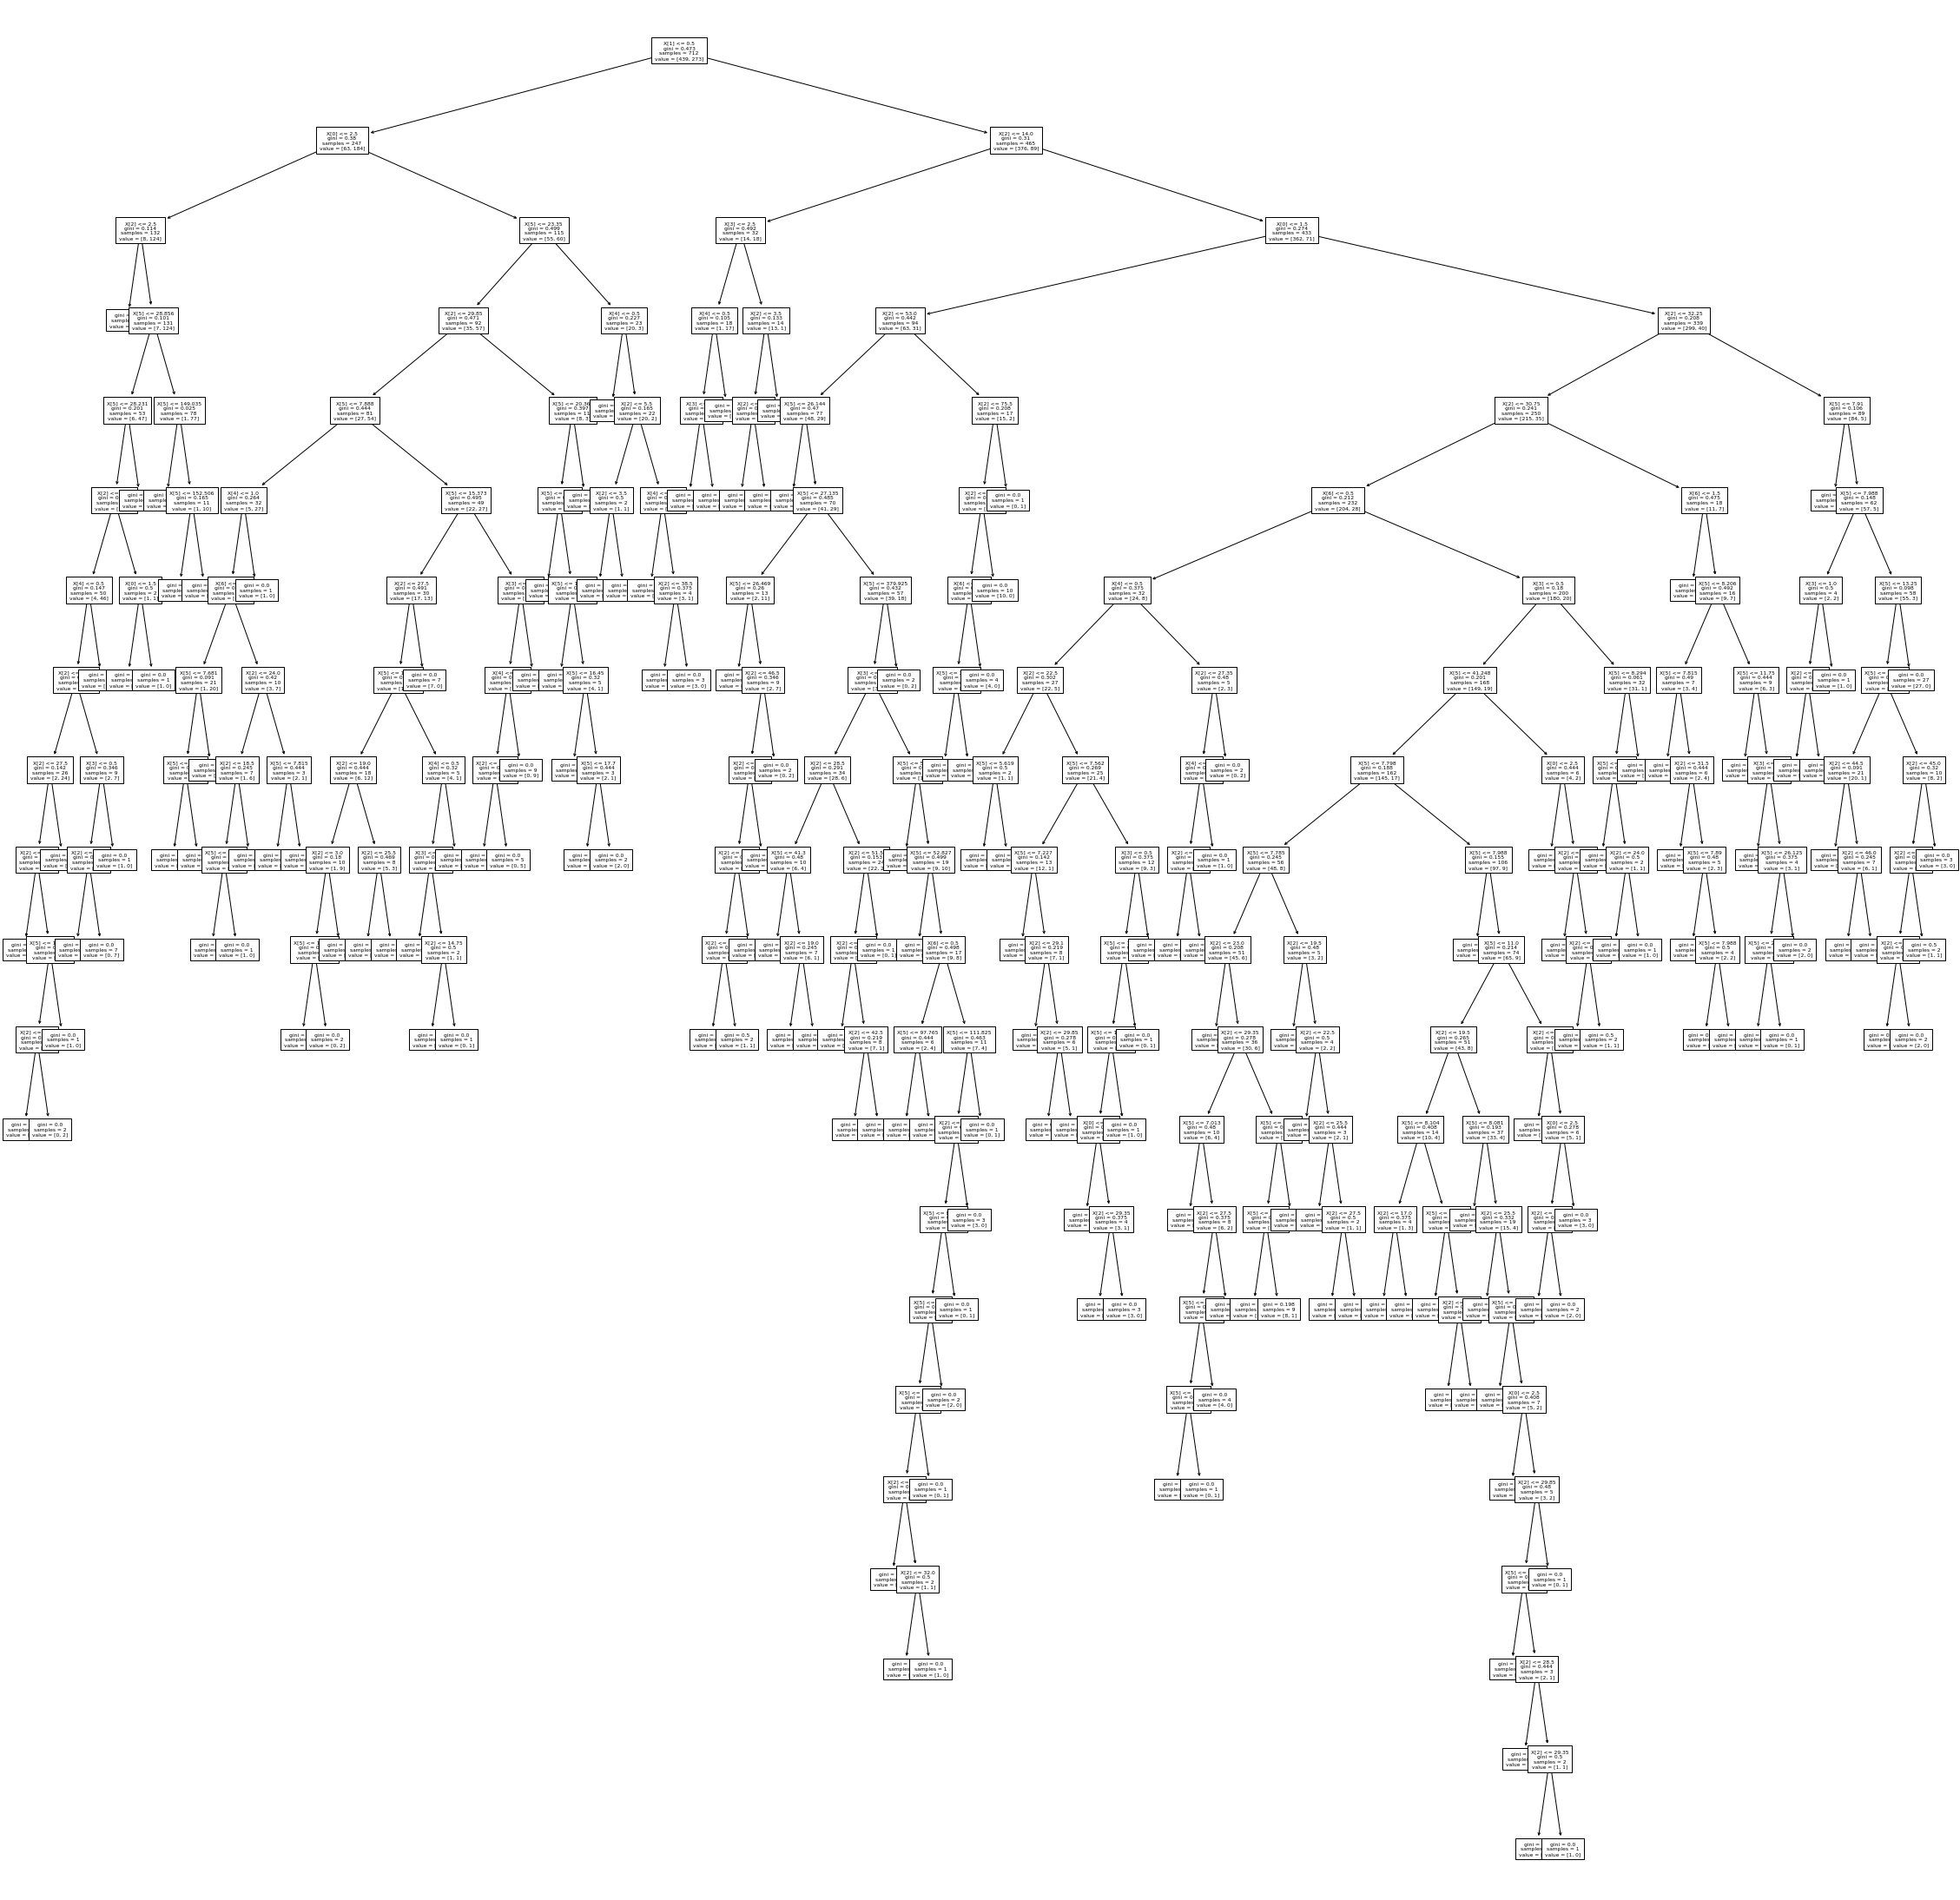

In [45]:
plt.figure(figsize=(40,40))
tree.plot_tree(desTree, fontsize=6)